<a href="https://colab.research.google.com/github/manvikhanna654/task_5_desicionTree/blob/main/DesicionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving heart(1).xls to heart(1).xls

📁 File uploaded: heart(1).xls

📊 Available columns:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

🌳 Decision Tree Performance:
Accuracy: 0.8097560975609757
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71        66
           1       0.87      0.85      0.86       139

    accuracy                           0.81       205
   macro avg       0.78      0.79      0.78       205
weighted avg       0.81      0.81      0.81       205



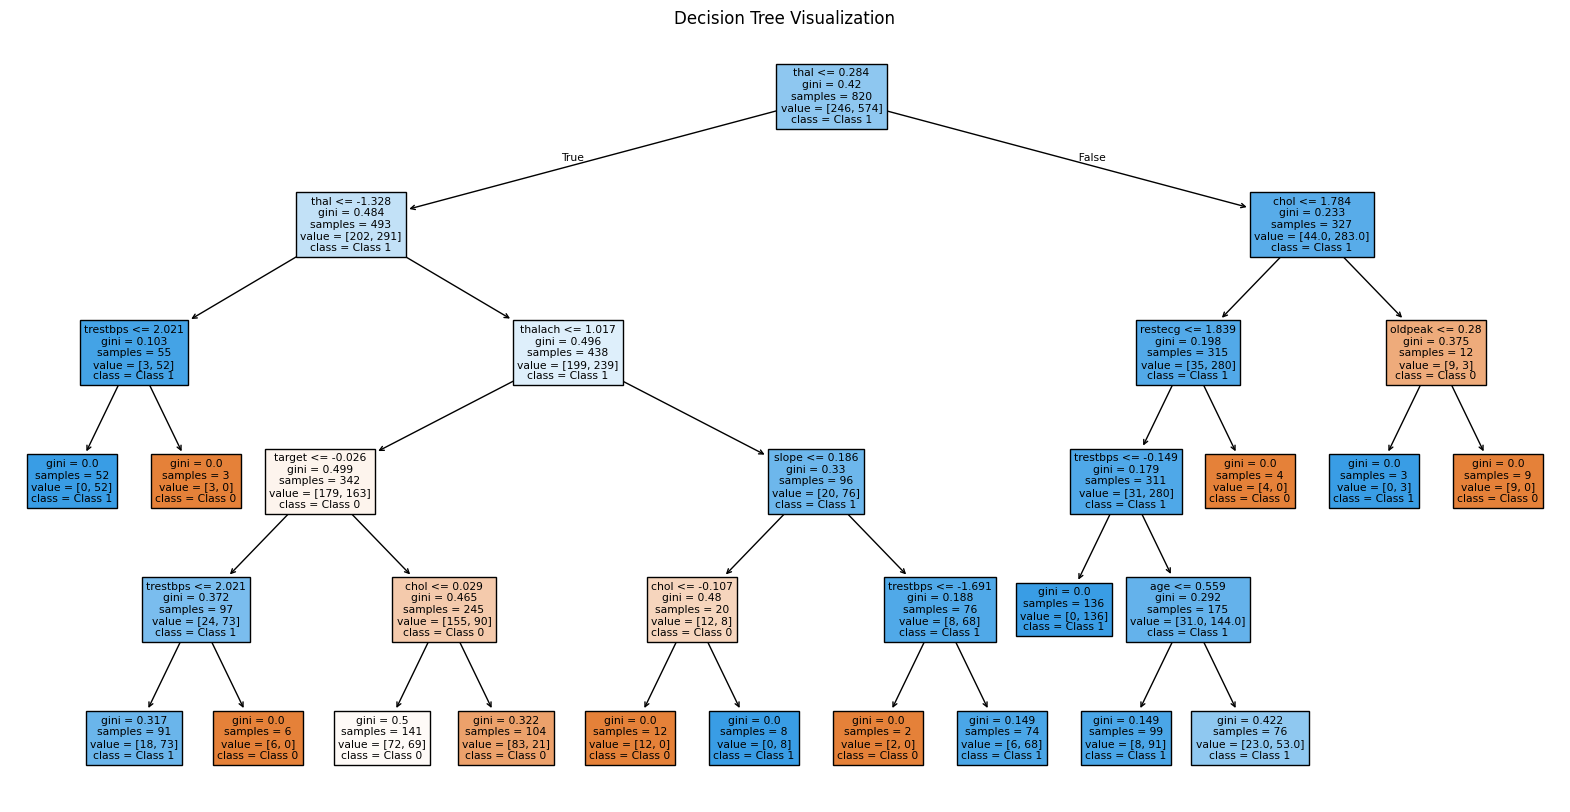


🌲 Random Forest Performance:
Accuracy: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        66
           1       0.98      1.00      0.99       139

    accuracy                           0.99       205
   macro avg       0.99      0.98      0.98       205
weighted avg       0.99      0.99      0.99       205



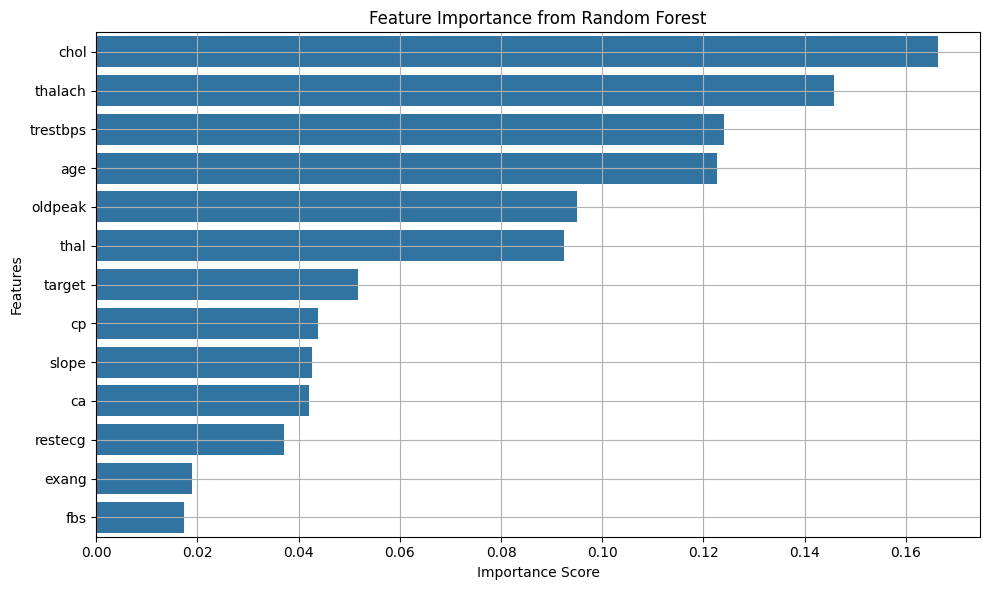


✅ Cross-validation Accuracy:
Decision Tree: 0.7980
Random Forest: 0.9883


In [1]:

from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler


filename = list(uploaded.keys())[0]
print(f"\n📁 File uploaded: {filename}")
df = pd.read_csv(filename)
df.columns = df.columns.str.strip()
print("\n📊 Available columns:")
print(df.columns.tolist())


target_col = ''
for col in df.columns:
    if df[col].nunique() <= 10 and df[col].dtype in ['object', 'int64']:
        target_col = col
        break

if target_col == '':
    raise ValueError("No suitable target column found. Please check your dataset.")


if df[target_col].dtype == 'object':
    df[target_col] = LabelEncoder().fit_transform(df[target_col])


df = pd.get_dummies(df)


X = df.drop(columns=[target_col])
y = df[target_col]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

print("\n🌳 Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)
y_pred_rf = rforest.predict(X_test)

print("\n🌲 Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


importances = rforest.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()


cv_score_dt = cross_val_score(dtree, X_scaled, y, cv=5)
cv_score_rf = cross_val_score(rforest, X_scaled, y, cv=5)

print("\n✅ Cross-validation Accuracy:")
print(f"Decision Tree: {np.mean(cv_score_dt):.4f}")
print(f"Random Forest: {np.mean(cv_score_rf):.4f}")
